<AxesSubplot:>

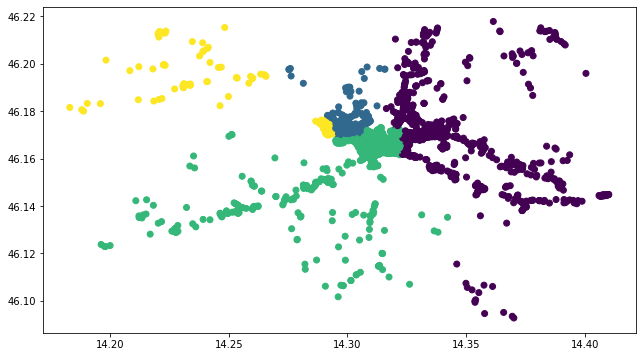

In [10]:
from shapely.geometry import Point, Polygon
import pandas as pd
import geopandas as gpd
import networkx as nx

g: nx.Graph = nx.read_pajek('../data/graphs/temp/skofja-loka-distances-06-19-2021-12-58-20-kmeans-06-19-2021-15-44-16.net')

latitude = []
longitude = []
labels = []

for node in g.nodes:
    latitude.append(float(g.nodes[node]['lat']))
    longitude.append(float(g.nodes[node]['lon']))
    labels.append(int(g.nodes[node]['cluster_id']))

df = pd.DataFrame(
    {'lat': latitude,
     'lon': longitude
    })

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
gdf.plot(figsize=(13, 6), c=labels)
